In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

2023-01-01 16:23:32.349325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [92]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [93]:
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max() #normalize data

In [94]:
X = df[predictors].values
Y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=40)

In [95]:
# One hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
count_classes = y_test.shape[1]

In [115]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=(8)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy','mse'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 100)               900       
                                                                 
 dense_84 (Dense)            (None, 50)                5050      
                                                                 
 dense_85 (Dense)            (None, 10)                510       
                                                                 
 dense_86 (Dense)            (None, 2)                 22        
                                                                 
Total params: 6,482
Trainable params: 6,482
Non-trainable params: 0
_________________________________________________________________


In [116]:
history = model.fit(X_test, y_test,epochs=100, verbose=0)

In [117]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

17/17 [==============================] - 0s 748us/step
Accuracy on training data: 0.7597765326499939% 
 Error on training data: 0.2402234673500061
8/8 [==============================] - 0s 716us/step
Accuracy on test data: 0.8311688303947449% 
 Error on test data: 0.16883116960525513


Text(0, 0.5, 'MSE')

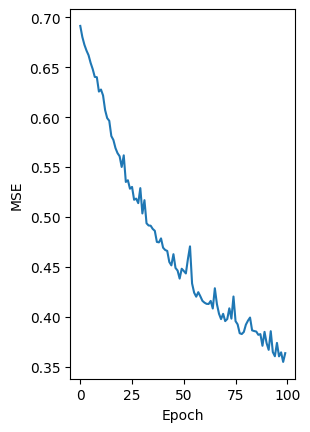

In [119]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("MSE")

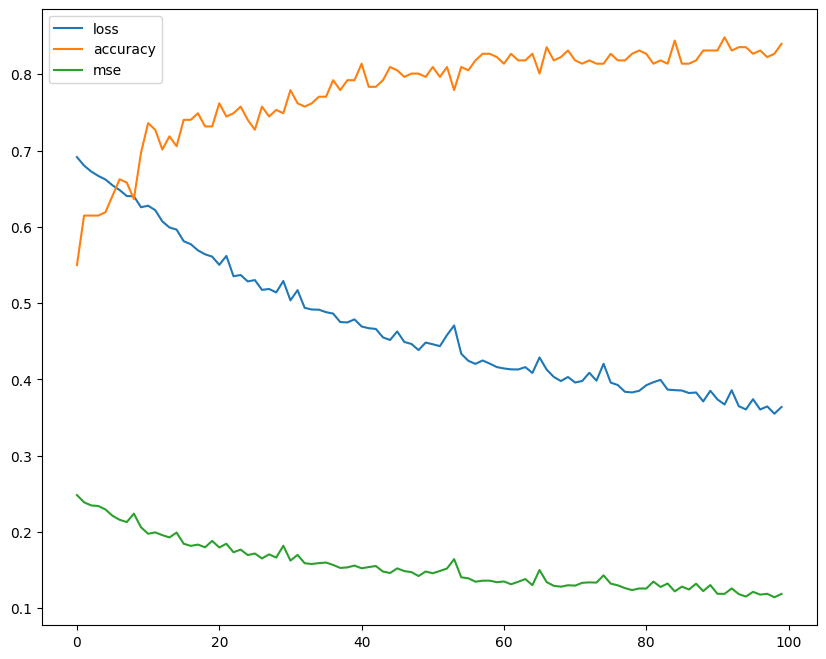

In [125]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.show()